In [1]:
# Importando as bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [3]:
# Dados fornecidos
lojas = ['A', 'B', 'C', 'D']
estoque = [500, 100, 300, 600]
vendas_2022 = {
    'Jan': [100, 80, 150, 50],
    'Fev': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abr': [180, 110, 230, 90],
    'Mai': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Set': [240, 160, 290, 130],
    'Out': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dez': [300, 350, 400, 250]
}


In [4]:
# a) Criar um dataframe com as Lojas A,B,C e D e o estoque de cada loja com chaves AA, BB, CC, DD
print("\na) DataFrame de Estoque das Lojas:")
print("-"*40)

df_estoque = pd.DataFrame({
    'Loja': lojas,
    'Estoque': estoque
}, index=['AA', 'BB', 'CC', 'DD'])

print(df_estoque)


a) DataFrame de Estoque das Lojas:
----------------------------------------
   Loja  Estoque
AA    A      500
BB    B      100
CC    C      300
DD    D      600


In [5]:
# b) Criar um dataframe com as lojas e vendas mensais com chaves AA,BB, CC,DD
print("\nb) DataFrame de Vendas Mensais:")
print("-"*40)

# Transpor o dicionário para ter lojas como colunas
df_vendas = pd.DataFrame(vendas_2022, index=['AA', 'BB', 'CC', 'DD'])
df_vendas.index.name = 'Loja'

print(df_vendas)

# Estatísticas básicas
print("\nEstatísticas das Vendas por Loja:")
print("-"*40)
print(df_vendas.describe().round(2))



b) DataFrame de Vendas Mensais:
----------------------------------------
      Jan  Fev  Mar  Abr  Mai  Jun  Jul  Ago  Set  Out  Nov  Dez
Loja                                                            
AA    100  120  150  180  220  230  250  260  240  220  400  300
BB     80   90  100  110  190  150  170  180  160  140  220  350
CC    150  170  200  230  350  280  300  310  290  270  350  400
DD     50   60   80   90  200  120  140  150  130  110  190  250

Estatísticas das Vendas por Loja:
----------------------------------------
          Jan    Fev     Mar     Abr     Mai     Jun     Jul     Ago     Set  \
count    4.00    4.0    4.00    4.00    4.00    4.00    4.00    4.00    4.00   
mean    95.00  110.0  132.50  152.50  240.00  195.00  215.00  225.00  205.00   
std     42.03   46.9   53.77   64.49   74.39   73.26   73.26   73.26   73.26   
min     50.00   60.0   80.00   90.00  190.00  120.00  140.00  150.00  130.00   
25%     72.50   82.5   95.00  105.00  197.50  142.50  162.50


c) Subplots - Vendas e Estoque em Janeiro:
----------------------------------------


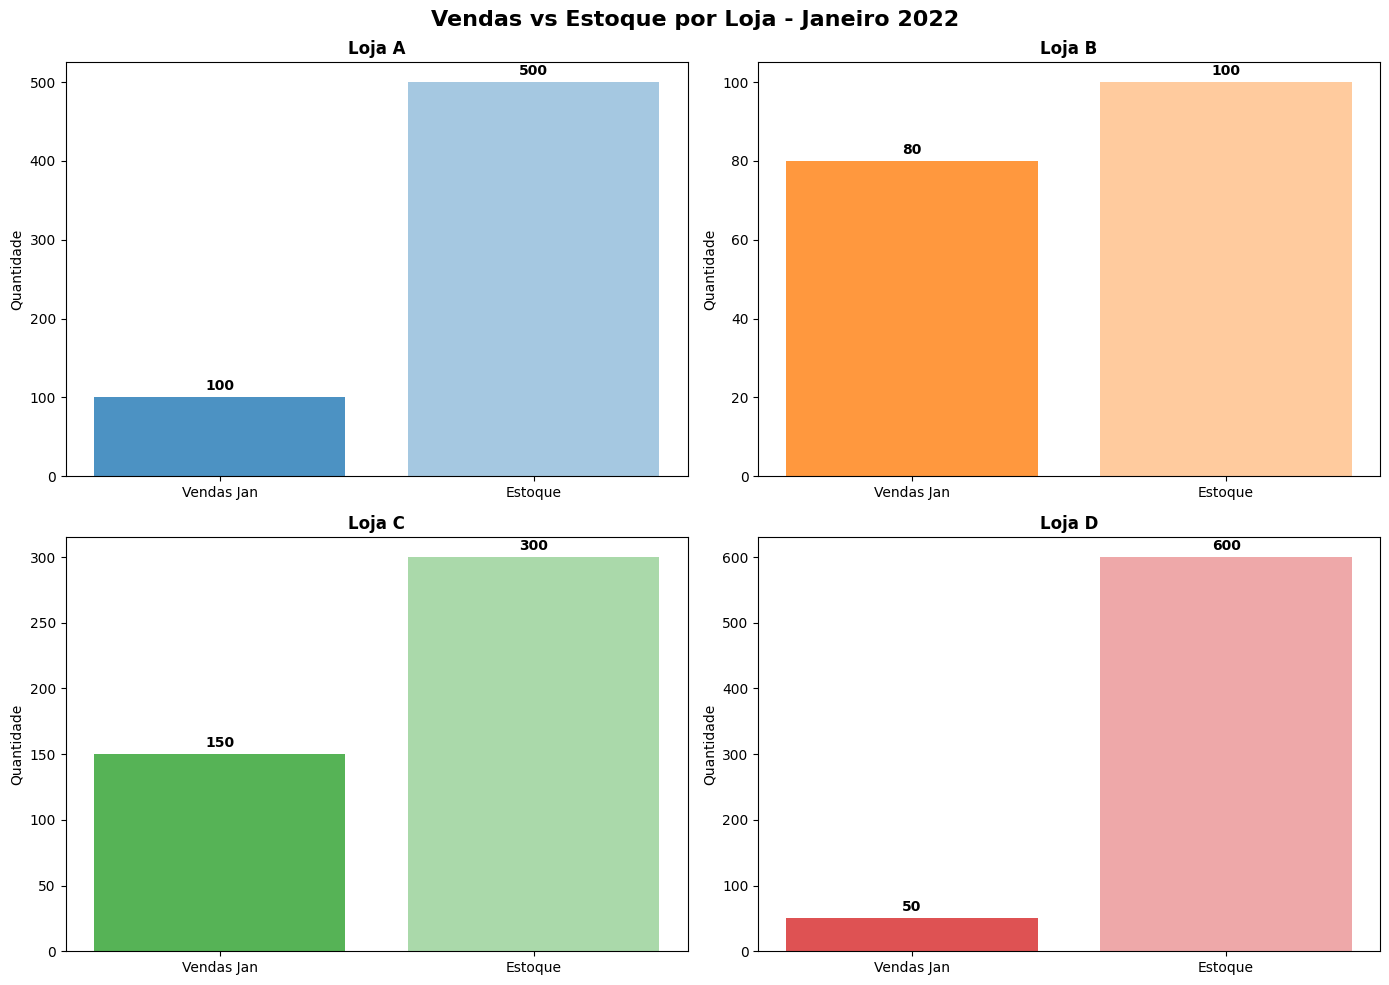

In [9]:
# c) Plotar um subplot para cada loja com vendas e estoque para janeiro
print("\nc) Subplots - Vendas e Estoque em Janeiro:")
print("-"*40)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Vendas vs Estoque por Loja - Janeiro 2022', fontsize=16, fontweight='bold')

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
lojas_nomes = ['Loja A', 'Loja B', 'Loja C', 'Loja D']

for i, (ax, loja, cor) in enumerate(zip(axes.flat, lojas_nomes, cores)):
    vendas_jan = df_vendas.iloc[i]['Jan']
    estoque_loja = df_estoque.iloc[i]['Estoque']
    
    # Gráfico de barras comparativo
    x = ['Vendas Jan', 'Estoque']
    y = [vendas_jan, estoque_loja]
    
    bars = ax.bar(x, y, color=cor)
    bars[0].set_alpha(0.8)
    bars[1].set_alpha(0.4)
    ax.set_title(f'{loja}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Quantidade')
    
    # Adicionar valores nas barras
    for bar, value in zip(bars, y):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(y)*0.01,
                f'{value}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


e) Gráficos de Linhas - Evolução das Vendas:
----------------------------------------


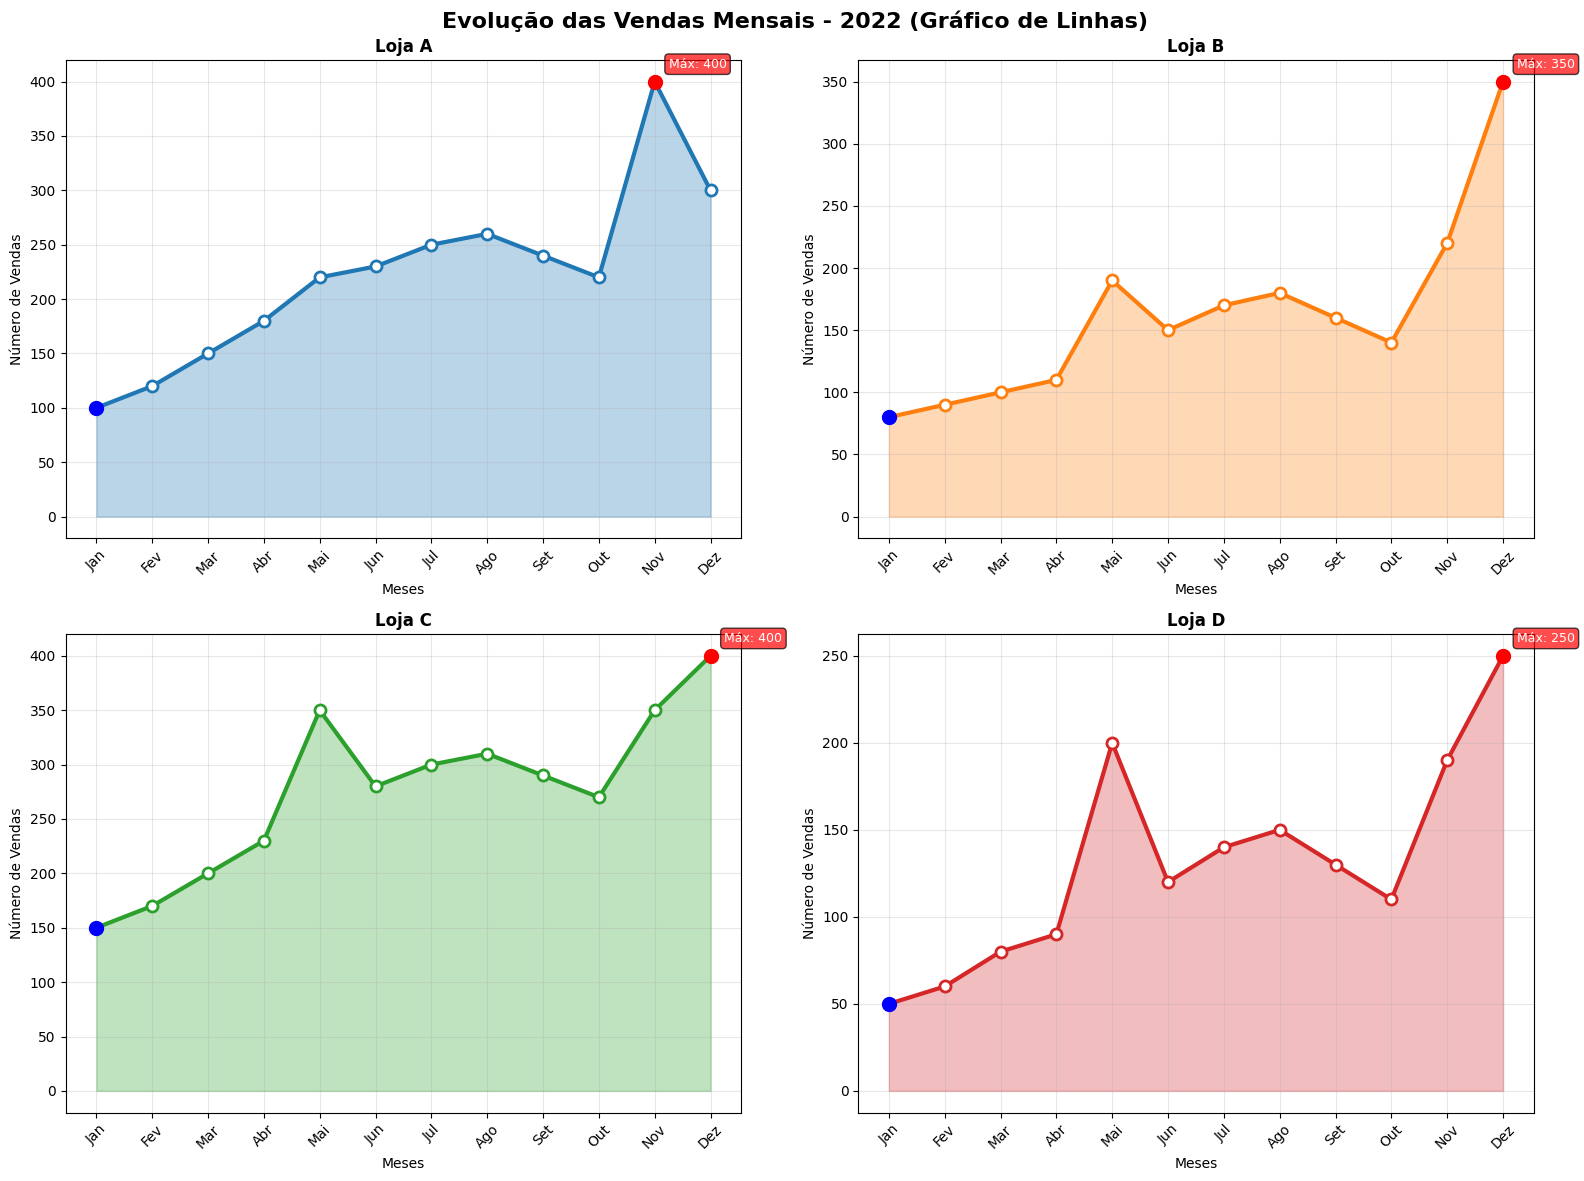

In [11]:
# e) Plotar gráfico de linhas para cada loja
print("\ne) Gráficos de Linhas - Evolução das Vendas:")
print("-"*40)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Evolução das Vendas Mensais - 2022 (Gráfico de Linhas)', fontsize=16, fontweight='bold')

for i, (ax, loja, cor) in enumerate(zip(axes.flat, lojas_nomes, cores)):
    vendas_loja = df_vendas.iloc[i].values
    
    ax.plot(meses, vendas_loja, color=cor, marker='o', linewidth=3, 
            markersize=8, markerfacecolor='white', markeredgecolor=cor, markeredgewidth=2)
    
    ax.fill_between(meses, vendas_loja, alpha=0.3, color=cor)
    ax.set_title(f'{loja}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Número de Vendas')
    ax.set_xlabel('Meses')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    
    # Destacar pontos máximo e mínimo
    max_idx = np.argmax(vendas_loja)
    min_idx = np.argmin(vendas_loja)
    
    ax.scatter(meses[max_idx], vendas_loja[max_idx], color='red', s=100, zorder=5)
    ax.scatter(meses[min_idx], vendas_loja[min_idx], color='blue', s=100, zorder=5)
    
    ax.annotate(f'Máx: {vendas_loja[max_idx]}', 
                xy=(meses[max_idx], vendas_loja[max_idx]),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7),
                fontsize=9, color='white')

plt.tight_layout()
plt.show()


f) Gráfico de Barras Horizontais - Comparativo Geral:
----------------------------------------


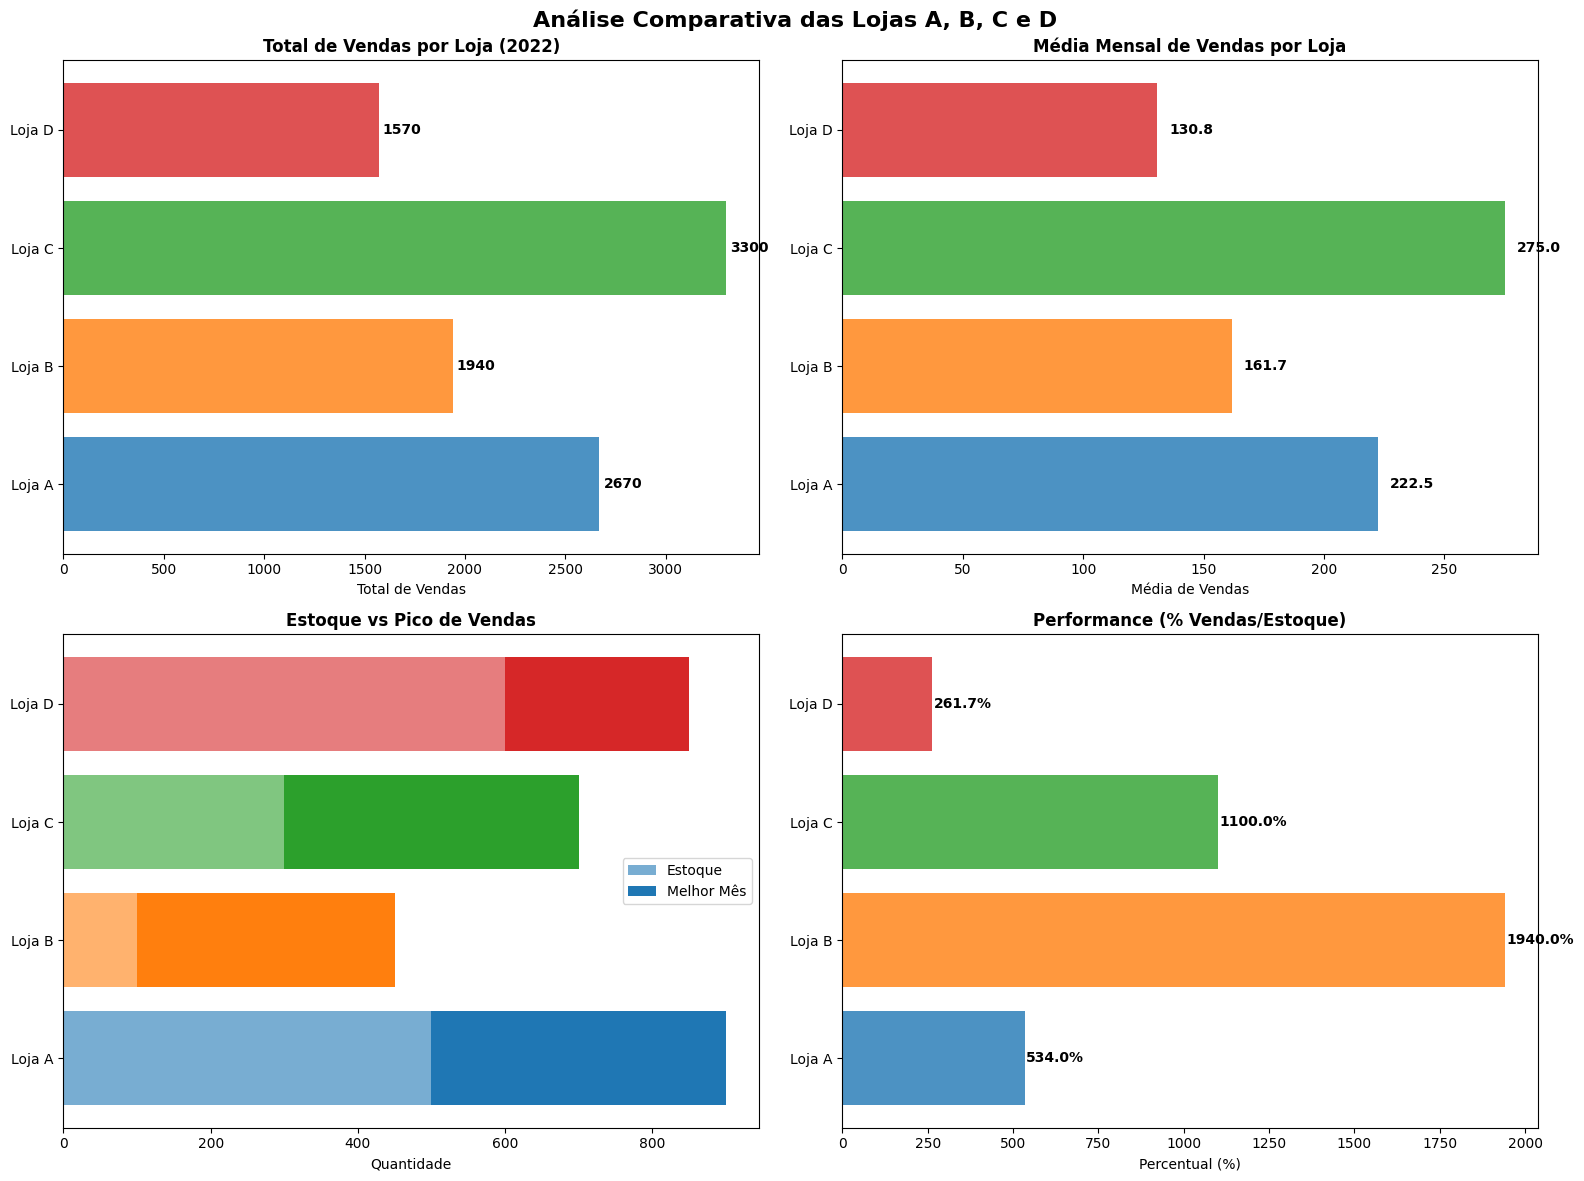

In [12]:
# f) Plotar gráfico de barras horizontal para todas as lojas
print("\nf) Gráfico de Barras Horizontais - Comparativo Geral:")
print("-"*40)

# Calcular métricas para comparação
vendas_totais = df_vendas.sum(axis=1)
vendas_media = df_vendas.mean(axis=1)
vendas_max = df_vendas.max(axis=1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análise Comparativa das Lojas A, B, C e D', fontsize=16, fontweight='bold')

# Gráfico 1: Vendas Totais
bars1 = ax1.barh(lojas_nomes, vendas_totais, color=cores, alpha=0.8)
ax1.set_title('Total de Vendas por Loja (2022)', fontweight='bold')
ax1.set_xlabel('Total de Vendas')
for i, (bar, valor) in enumerate(zip(bars1, vendas_totais)):
    ax1.text(valor + 20, bar.get_y() + bar.get_height()/2, 
             f'{valor}', ha='left', va='center', fontweight='bold')

# Gráfico 2: Vendas Médias
bars2 = ax2.barh(lojas_nomes, vendas_media, color=cores, alpha=0.8)
ax2.set_title('Média Mensal de Vendas por Loja', fontweight='bold')
ax2.set_xlabel('Média de Vendas')
for i, (bar, valor) in enumerate(zip(bars2, vendas_media)):
    ax2.text(valor + 5, bar.get_y() + bar.get_height()/2, 
             f'{valor:.1f}', ha='left', va='center', fontweight='bold')

# Gráfico 3: Estoque vs Melhor Mês
bars3 = ax3.barh(lojas_nomes, df_estoque['Estoque'], color=cores, alpha=0.6, label='Estoque')
bars4 = ax3.barh(lojas_nomes, vendas_max, color=cores, alpha=1.0, 
                left=df_estoque['Estoque'], label='Melhor Mês')
ax3.set_title('Estoque vs Pico de Vendas', fontweight='bold')
ax3.set_xlabel('Quantidade')
ax3.legend()

# Gráfico 4: Performance Relativa (Vendas/Estoque)
performance = (vendas_totais / df_estoque['Estoque']) * 100
bars5 = ax4.barh(lojas_nomes, performance, color=cores, alpha=0.8)
ax4.set_title('Performance (% Vendas/Estoque)', fontweight='bold')
ax4.set_xlabel('Percentual (%)')
for i, (bar, valor) in enumerate(zip(bars5, performance)):
    ax4.text(valor + 5, bar.get_y() + bar.get_height()/2, 
             f'{valor:.1f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()